In [36]:
#!/usr/bin/python3 (3.8.10 x64)
import numpy as np
import pygad
import os
import mazes

Create a function that reads the 2D representation of a maze and returns the shortest path found by a genetic algorithm.

In [37]:
# Convert mazes into 2D array of chars
def get_maze(maze):
    res = []
    for i in range(len(maze)):
        row = list(list(maze[i])[0])
        res.append(row)
        
    return np.array(res)

In [38]:
# Convert mazes
maze1 = get_maze(mazes.maze1)
maze2 = get_maze(mazes.maze2)
maze3 = get_maze(mazes.maze3)
maze4 = get_maze(mazes.maze4)
maze5 = get_maze(mazes.maze5)
maze6 = get_maze(mazes.maze6)
maze7 = get_maze(mazes.maze7)
maze3_T = get_maze(mazes.maze3_T) 
maze4_T = get_maze(mazes.maze4_T) 
maze5_T = get_maze(mazes.maze5_T) 
maze7_T = get_maze(mazes.maze7_T) 

In [39]:
# Return a tuple containing indices of start
def find_start(maze):
    '''
        Return an array containing indices of start
    '''
    maze = np.array(maze)
    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i,j] == "S":
                return i,j

In [40]:
# Return a tuple containing indices of end
def find_end(maze):
    '''
    Return an array containing indices of end
    '''
    maze = np.array(maze)
    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i,j] == "E":
                return i,j

Solution will be encoded as follows:
* It will be a vector of values (np array)
* Each value will span from 0 to 3
* Each value corresponds to a direction 
* * 0 - up
* * 1 - down
* * 2 - left
* * 3 - right

Maze: `h x w` matrix, possible values of maze[i,j]:
* `#` - wall
* `.` - valid field
* `S` - starting field
* `E` - ending field

Maze[i,j] gives:
*   (0) up = Maze[i-1, j]
*   (1) down = Maze[i+1, j]
*   (2) left = Maze[i, j-1]
*   (3) right = Maze[i, j+1]

In [343]:
solutions = [False]
def set_solutions_false():
    solutions[0] = False
    
def shortest_path(maze, i, j, visited):
    if [i,j] in visited:
        return 0
    
    path_len = 0
    visited.append([i,j])
        
    if maze[i,j] == "E":
        solutions[0] = True;
        return 0
    
    if i > 0 and maze[i-1, j] != "#":
        path_len = shortest_path(maze, i-1, j, visited) + 1
        if solutions[0]:
            maze[i,j] = "0"
            return path_len
    
    if j > 0 and maze[i, j-1] != "#":
        path_len = shortest_path(maze, i, j-1, visited) + 1
        if solutions[0]:
            maze[i,j] = "0"
            return path_len
        
    if i < maze.shape[0]-1 and maze[i+1, j] != "#":
        path_len = shortest_path(maze, i+1, j, visited) + 1
        if solutions[0]:
            maze[i,j] = "0"
            return path_len
         
    
    if j < maze.shape[1]-1 and maze[i, j+1] != "#":
        path_len = shortest_path(maze, i, j+1, visited) + 1
        if solutions[0]:
            maze[i,j] = "0"
            return path_len    
        
    visited.remove([i,j])

    solutions[0] = False
    return path_len

solutions = [False]

In [344]:
def get_shortest_path(maze):
    set_solutions_false()
    start = find_start(maze)
    m = maze.copy()
    res = shortest_path(m, start[0], start[1], [])
    return res, m
    

In [836]:
# Choose which maze to solve
maze = maze1


In [837]:
maze

array([['#', '#', 'E', '#', '#'],
       ['#', '.', '.', '.', '#'],
       ['#', '.', '.', '.', '#'],
       ['#', 'S', '.', '.', '#'],
       ['#', '#', '#', '#', '#']], dtype='<U1')

In [838]:
import time as time

In [839]:
path_len, _ = get_shortest_path(maze)
y, x = find_start(maze)

end = find_end(maze)

def fitness(solution, solution_index):
    '''
        Takes in a maze and a solution and solution_index
        Returns a scalar score
    '''
    score = 0
    seen = []

    i, j = y, x

    
    for move in solution:

        # Determine new position
        if move == 0:
            i -= 1
        elif move == 1:
            i += 1
        elif move == 2:
            j -= 1
        elif move == 3:
            j += 1     

 
        # Out of bounds
        if i < 0 or j < 0 or i > len(maze[0])-1 or j > len(maze[1])-1:
            return -score



        if maze[i, j] == ".":
            score += 2;        
        #if i < 0:
        #    i = 0
        #elif i > len(maze)-1:
        #    i = len(maze)-1

        #if j < 0:
        #    j = 0
        #elif j > len(maze[0])-1:
        #    j = len(maze[0])-1
        #elif position in seen:
        #    score -= len(seen);
            #break;

        # Finish
        if maze[i, j] == "E":
            
            print("SOLUTION")
            score +=  990
            return score
        
            #seen.append(position)
            #break
        #try: 
        #    m[i,j] = "X"
        #    print("move:", move, "score:", score, "\n\n", m)
        #    time.sleep(3)
        #except IndexError:
        #    print("out of bounds")
            
        # Reward staying on path 

        #    pass
            #score += 15 * (path_len - ix)
        
        # Penalize wall and path length
        if maze[i, j] == "#":
            #print(f"wall:  {score_}")
            score -= 10  # (path_len - ix)**2
            #print(f"new score_ {score_}")
            seen.append((i,j))
            #return score
            #seen.append(position)
    
    return score


In [851]:
num_generations = 1000
num_parents_mating = 100

solutions_per_pop = 100

num_genes =  maze.shape[0]* 10
num_genes, dfs_solution = get_shortest_path(maze)
print(num_genes)

init_range_low = 0
init_range_high = 4

parent_selection_type = "sss"
keep_parents = 50

crossover_type = "single_point"
crossover_probability = 0.1

mutation_type = "swap"
mutation_probability = 0.1
mutation_percent_genes = 0.1

4


In [852]:
def callback_gen(ga_instance):
    print("Generation : ", ga_instance.generations_completed)
    print("Fitness of the best solution :", ga_instance.best_solution()[1])

In [853]:
unique_vals = []
def on_crossover(ga_instance, children):
    print(ga_instance.generations_completed, children)
    unique_vals.append(children[0][0])
    
first_child = []
def on_mutation(ga_instance, children):
    first_child.append(children[0])

In [854]:
ga_instance = pygad.GA(num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness,
                        sol_per_pop=solutions_per_pop,
                        num_genes=num_genes,
                        gene_type=int,
                        parent_selection_type=parent_selection_type,
                        crossover_type=crossover_type,
                        #crossover_probability=crossover_probability,
                        mutation_type=mutation_type,
                        #keep_elitism=solutions_per_pop//2,
                        #random_mutation_min_val=0,
                        #random_mutation_max_val=3,
                        #mutation_by_replacement=True,
                        #suppress_warnings=True,
                        gene_space=[0,1,2,3],
                        #mutation_percent_genes=mutation_percent_genes,
                        #mutation_probability=mutation_probability,
                        on_generation=callback_gen,
                        random_seed=420,
                        #on_crossover=on_crossover
                        )

/home/sebastijan/.local/lib/python3.8/site-packages/pygad/pygad.py:486: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


In [855]:
def visualize(maze, solution):
    m = maze.copy()
    pos = find_start(maze)
    sol = []
    solved = False
    for step in solution:
        try:
     
            if step == 0:
                sol.append("U")
                pos[0] -= 1
            elif step == 1:
                sol.append("D")
                pos[0] += 1
            elif step == 2:
                sol.append("L")
                pos[1] -= 1
            elif step == 3:
                sol.append("R")
                pos[1] += 1
                
            i,j = pos[0], pos[1]
            if i < 0:
                i = 0
            elif i > len(maze)-1:
                i = len(maze)-1

            if j < 0:
                j = 0
            elif j > len(maze[0])-1:
                j = len(maze[0])-1
                
            
            pos[0], pos[1] = i, j    
            
                
            if m[pos[0], pos[1]] == "E":
                solved = True
                m[pos[0], pos[1]] == "X"
            if (pos[0] > -1 and pos[1] > -1 and solved == False):
                m[pos[0], pos[1]] = "O" 
        except Exception as e: #IndexError:
            #pass
            print(f"Exception: {e}")
            
    return m, sol


In [856]:
ga_instance.run()

SOLUTION
Generation :  1
Fitness of the best solution : 996
SOLUTION
Generation :  2
SOLUTION
Fitness of the best solution : 996
SOLUTION
Generation :  3
SOLUTION
Fitness of the best solution : 996
SOLUTION
SOLUTION
SOLUTION
Generation :  4
SOLUTION
SOLUTION
SOLUTION
Fitness of the best solution : 996
Generation :  5
Fitness of the best solution : 996
SOLUTION
Generation :  6
SOLUTION
Fitness of the best solution : 996
SOLUTION
Generation :  7
SOLUTION
Fitness of the best solution : 996
SOLUTION
SOLUTION
Generation :  8
SOLUTION
SOLUTION
Fitness of the best solution : 996
Generation :  9
Fitness of the best solution : 996
Generation :  10
Fitness of the best solution : 996
Generation :  11
Fitness of the best solution : 996
Generation :  12
Fitness of the best solution : 996
SOLUTION
SOLUTION
Generation :  13
SOLUTION
SOLUTION
Fitness of the best solution : 996
Generation :  14
Fitness of the best solution : 996
Generation :  15
Fitness of the best solution : 996
Generation :  16
Fitne

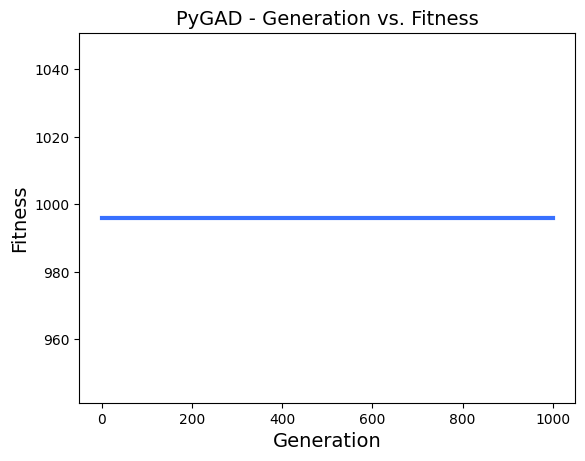

Parameters of the best solution : [3 0 0 0] index =  0
Fitness value of the best solution = 996


In [857]:
ga_instance.plot_fitness()
ga_instance.save("maze2-solved-2")

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution), "index = ", solution_idx)
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
#print(unique_vals)
#prediction = np.sum(np.array(ins)*solution)
#print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

In [858]:
m, sol = visualize(maze, solution)

print("fitness: ", fitness([0, 1, 0, 3, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 3, 0, 1, 3, 3, 2, 2, 1, 2, 0, 3, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 3
, 3, 1, 0, 1, 0, 2, 2, 3, 0, 0, 2, 1, 3], 0))
_, dfs_solution = get_shortest_path(maze)
print("solution", sol)
print("GA\n", m, len(solution), "\n")
print("DFS\n", dfs_solution)

fitness:  12
solution ['R', 'U', 'U', 'U']
GA
 [['#' '#' 'E' '#' '#']
 ['#' '.' 'O' '.' '#']
 ['#' '.' 'O' '.' '#']
 ['#' 'S' 'O' '.' '#']
 ['#' '#' '#' '#' '#']] 4 

DFS
 [['#' '#' 'E' '#' '#']
 ['#' '0' '0' '.' '#']
 ['#' '0' '.' '.' '#']
 ['#' '0' '.' '.' '#']
 ['#' '#' '#' '#' '#']]


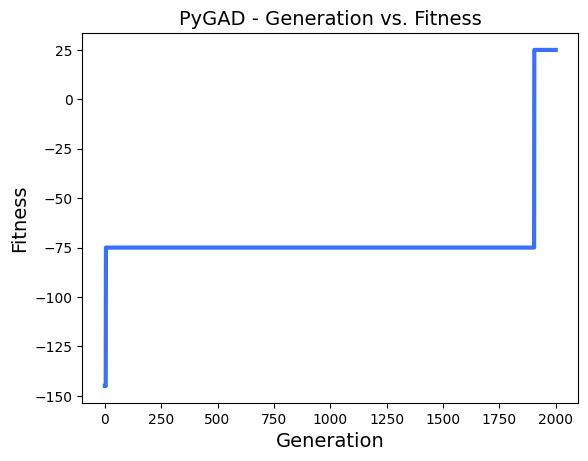

SOLUTION
SOLUTION
SOLUTION
(array([3, 0, 0, 3, 2, 0, 0, 2, 1, 2]), 1000, 54)


In [859]:
loaded = pygad.load("maze2-solved")
loaded.plot_fitness()
print(loaded.best_solution())

In [860]:
print(fitness([1, 1, 0, 2, 3, 2, 2, 0, 2, 0, 3, 3, 3, 3, 3, 0,2 ,3, 1, 2, 2, 0, 2, 1, 2], 0))
m, sol = visualize(maze, [1, 1, 0, 2, 3, 2, 2, 0, 2, 0, 3, 3, 3, 3, 3, 0,2 ,3, 1, 2, 2, 0, 2, 1, 2])
print(maze, "\n\n", m, sol)

10
[['#' '#' 'E' '#' '#']
 ['#' '.' '.' '.' '#']
 ['#' '.' '.' '.' '#']
 ['#' 'S' '.' '.' '#']
 ['#' '#' '#' '#' '#']] 

 [['#' '#' 'E' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O']
 ['O' '.' '.' '.' '#']
 ['O' 'O' '.' '.' '#']
 ['#' 'O' '#' '#' '#']] ['D', 'D', 'U', 'L', 'R', 'L', 'L', 'U', 'L', 'U', 'R', 'R', 'R', 'R', 'R', 'U', 'L', 'R', 'D', 'L', 'L', 'U', 'L', 'D', 'L']
